<a href="https://colab.research.google.com/github/vin136/Machine-Learning-Interview-Questions/blob/main/nbs/0_Background.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pobability : Knowledge test

1. How to calculate the empirical covariance of a random vector ?

2. Multivariate Gaussian, what is the distribution of marginal and conditional ?

3. What's the distribution of a random variable that is product of two gaussians ? Any linear transformation of a gaussian random variable's ?

1. Which of the following are true :

- two random variables can have covariance zero but are not statistically independent.

- pair-wise independence imply mutual independence

Sol:

False,False

2. How will you generate arbitrary univariate distributions if you can only sample from uniform ?



Solution:
If y = cdf(x), then y is uniform distributed

$P(X <= F^{-1}(u)) = P(F(X) <= u) = u $

$F(x) = \int_{-\infty}^{x} f(t) dt$

$F^{-1}(x) = \inf\{y|F(y) \geq x\}$

$P(X \leq F^{-1}(u)) = P(F(X) \leq u) = u$



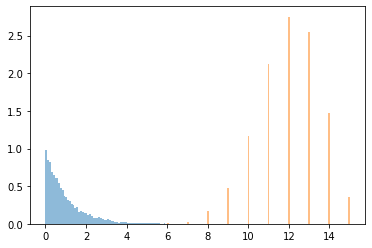

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Using inverse cdf
def exponential(lambda_, size):
  #inverse cdf of exponental = -1/\lambda* ln(1-u)
    U = np.random.uniform(size=size)
    X = (-1/lambda_)*np.log(1-U)
    return X

#using generative definition/sampling
def binomial(p,n):
  # bin = x1 + x2 + ..xn,where xi is bernouli
  simulate = 10000
  out = []
  for i in range(simulate):
    U = np.random.uniform(size=n)
    out.append(np.sum(U<=p))
  return out
        


_ = plt.hist(exponential(1, 10000), bins=100, density=True, alpha=0.5, label='Exponential')
_ = plt.hist(binomial(0.8,15), bins=100, density=True, alpha=0.5, label='binomial')


3. My neighbor has two children. Assuming that the gender of a child is like a coin flip, it is most likely, a priori, that my neighbor has one boy and one girl, with probability 1/2. The other possibilities—two boys or two girls—have probabilities 1/4 and 1/4.
a. Suppose I ask him whether he has any boys, and he says yes. What is the probability that one child is a girl?
b. Suppose instead that I happen to see one of his children run by, and it is a boy. What is the probability that the other child is a girl?

Sol:

a. 2/3  b. 1/2

Define events => Use bayes rule

# Statistics

1. What are the motivations behing using mle?



sol:

1. As an approbimation to MAP under uniform prior.

2. Minimize KL(p||q) where p is empirical data distribution, and q is the estimated distribution. This translates to reducing NLL.

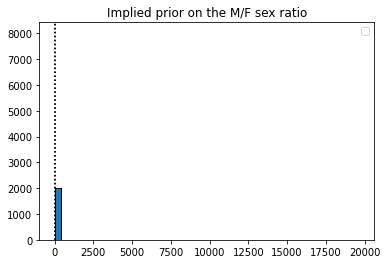

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# histogram of implied prior on the M/F sex ratio
plt.hist(1 / np.random.uniform(size=2000) - 1, bins=50, edgecolor='black')
plt.title('Implied prior on the M/F sex ratio')
plt.xlabel('phi')

a = 438
b = 544
theta = np.random.beta(a, b, size=10000)
phi = (1 - theta) / theta
quantiles = [0.025, 0.975]
theta_quantiles = np.quantile(theta, quantiles)
phi_quantiles = np.quantile(phi, quantiles)

# merge the data into one data frame for plotting
df1 = pd.DataFrame({'phi': phi, 'theta': theta}).melt(var_name='variable')
# merge quantiles into one data frame for plotting
df2 = pd.DataFrame({'phi': phi_quantiles, 'theta': theta_quantiles}).melt(var_name='variable')

sns.histplot(df1, x='value', hue='variable', bins=30)
for quantile in phi_quantiles:
    plt.axvline(x=quantile, linestyle='dotted', color='black')
plt.legend(title=None)
plt.xlabel('')
plt.ylabel('')
plt.show()


Mean of theta1:  1.9553571428571428
95% credible interval of theta1:  (1.7049431489418194, 2.2226790202451725)
Mean of theta2:  1.511111111111111
95% credible interval of theta2:  (1.1734369056138327, 1.8908362583954745)


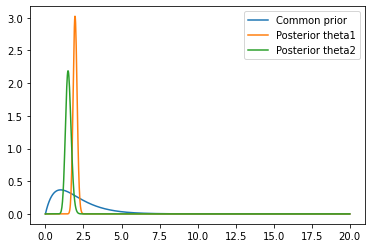

Posterior probability of theta1 > theta2:  0.9731


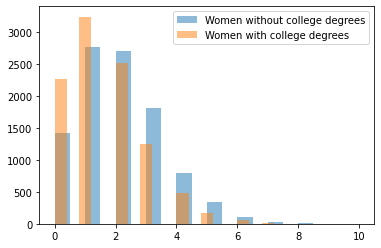

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the parameters
n1 = 111
n2 = 44
sum_y1 = 217
sum_y2 = 66
alpha = 2
beta = 1

# Posterior distributions for theta1 and theta2
posterior_theta1 = stats.gamma(alpha + sum_y1, scale = 1 / (beta + n1))
posterior_theta2 = stats.gamma(alpha + sum_y2, scale = 1 / (beta + n2))

# Mean and 95% credible interval for theta1
mean_theta1 = (alpha + sum_y1) / (beta + n1)
lower_theta1, upper_theta1 = posterior_theta1.interval(0.95)
print("Mean of theta1: ", mean_theta1)
print("95% credible interval of theta1: ", (lower_theta1, upper_theta1))

# Mean and 95% credible interval for theta2
mean_theta2 = (alpha + sum_y2) / (beta + n2)
lower_theta2, upper_theta2 = posterior_theta2.interval(0.95)
print("Mean of theta2: ", mean_theta2)
print("95% credible interval of theta2: ", (lower_theta2, upper_theta2))

# Plot the common prior and posterior distributions for theta1 and theta2
x = np.linspace(0, 20, 1000)
plt.plot(x, stats.gamma.pdf(x, alpha, scale=1/beta), label='Common prior')
plt.plot(x, posterior_theta1.pdf(x), label='Posterior theta1')
plt.plot(x, posterior_theta2.pdf(x), label='Posterior theta2')
plt.legend()
plt.show()

# Simulate the posterior probability of theta1 > theta2
sim_samples = np.random.gamma(alpha + sum_y1, scale=1 / (beta + n1), size=10000)
sim_samples2 = np.random.gamma(alpha + sum_y2, scale=1 / (beta + n2), size=10000)
prob = np.mean(sim_samples > sim_samples2)
print("Posterior probability of theta1 > theta2: ", prob)

# Posterior predictive distributions of number of children for women with/without college degrees
predictive_theta1 = np.random.poisson(lam=sim_samples, size=10000)
predictive_theta2 = np.random.poisson(lam=sim_samples2, size=10000)

# Plot the posterior predictive distributions
plt.hist(predictive_theta1, bins=20, alpha=0.5, label='Women without college degrees')
plt.hist(predictive_theta2, bins=20, alpha=0.5, label='Women with college degrees')
plt.legend()


Normal Distribution (N(θ, σ2)):
The normal distribution has the density function:

$$ p(y_i|\theta, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(y_i - \theta)^2}{2\sigma^2}} $$

The natural parameter for the normal distribution is:

$$ \phi(\theta) = \frac{\theta}{\sigma^2} $$

And the sufficient statistic for the normal distribution is:

$$ t(y) = \frac{\sum_{i=1}^{n} y_i}{\sigma^2} $$

Poisson Distribution (Poisson(θ)):
The Poisson distribution has the density function:

$$ p(y_i|\theta) = \frac{\theta^{y_i}e^{-\theta}}{y_i!} $$

The natural parameter for the Poisson distribution is:

$$ \phi(\theta) = \ln(\theta) $$

And the sufficient statistic for the Poisson distribution is:

$$ t(y) = \sum_{i=1}^{n} y_i $$

Binomial Distribution (Binomial(n, θ)):
The binomial distribution has the density function:

$$ p(y_i|n,\theta) = \binom{n}{y_i} \theta^{y_i} (1 - \theta)^{n-y_i} $$

The natural parameter for the binomial distribution is:

$$ \phi(\theta) = \ln\left(\frac{\theta}{1-\theta}\right) $$

And the sufficient statistic for the binomial distribution is:

$$ t(y) = \sum_{i=1}^{n} y_i $$